In [1]:
from hlm_basic.hlm_models import dam_q, dam_q_varParam, dam_q_varParam_varState
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import math

# OLD DAM SETUP

In [2]:
def plot_QSv(h_spill, h_max, s_max, alpha, diameter,c1, c2, L_spill, L_crest, state=1, area=None, axes=None, save=None):
    rcParams.update({'font.size': 13,'axes.labelweight':'bold','axes.labelsize':14,\
                                'ytick.major.size':6,'xtick.major.size':6,'xtick.direction':'in','ytick.direction':'in',\
                                'lines.linewidth':2.5})
    dam_params = ['pass',h_spill, h_max, s_max, alpha, diameter,c1, c2, L_spill, L_crest]
    storage = np.arange(0, s_max+50000, 100)
    height = [h_max * pow(ss / s_max, alpha) for ss in storage]
    discharge = [dam_q(hh, state, dam_params) for hh in height]
    
    ## Plot height-storage relationship
    if axes is not None:
        ax1 = axes[0]
        ax2 = axes[1]
    else:
        fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
        ax1 = ax[0]
        ax2 = ax[1]
    ax1.plot(storage, height, c ='k')
    ax1.axvline(x=s_max, c='r', linewidth=2)
    ax1.set(xlabel='Storage [10$^3$ m$^{3}$]',ylabel ='Height [m]',)
    ax1.grid()
    ax1.set_xticks(np.arange(0, s_max+50000, 100000))
    ax1.set_xticklabels(np.arange(0, (s_max+50000)/1000, 100).astype(int))
    ## Plot discharge-storage relationship
    ax2.plot(storage, discharge, c ='k')
    ax2.axvline(x=s_max, c='k', linewidth=2, linestyle='dashdot')
    if area is not None:
        ax2.axhline(y=3.12*(area**(0.57)), c='r', linewidth=2, linestyle='dashed')
        ax2.text(20000,3.12*(area**(0.57)) , 'Mean Annual Flood m$^3$/s', va='bottom', ha='left')
    ax2.set(xlabel='Storage [10$^3$ m$^3$]',ylabel ='Discharge [m$^3$/s]')
    ax2.grid()
    plt.subplots_adjust(wspace=0.3)
    plt.suptitle('H$_{spill}$=%.1fm   H$_{max}$=%.1fm  S$_{max}$=%dm$^3$'r'   $\alpha$=%.1f''\n'\
                    ' OD=%.2fm   c$_1$= %.1f    c$_2$=%.2f    L$_{spill}$=%.1fm    L$_{crest}$=%.1fm'\
                    %(h_spill, h_max, s_max, alpha,diameter,c1, c2, L_spill, L_crest ), size=15, y=1.05)
    if save is not None:
        fig.savefig(save + '.png', bbox_inches = 'tight', pad_inches = 0.5)
    return ax1, ax2

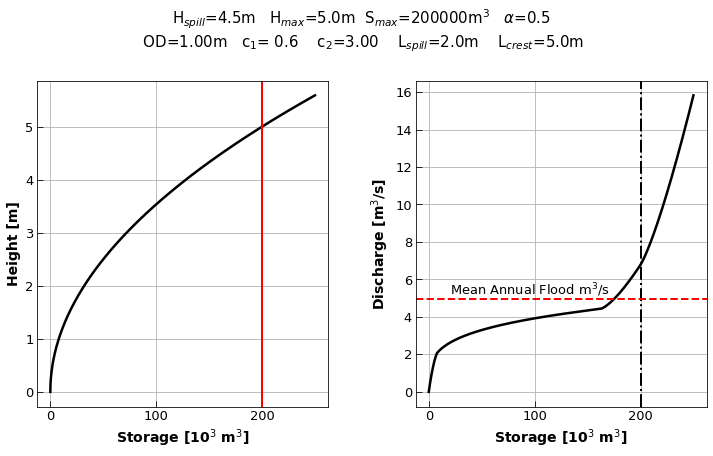

In [3]:
### USE this for order three
ax1, ax2 = plot_QSv(4.5, 5, 200000, 0.5, 1.0, 0.6, 3.0, 2, 5, state=1, area=2.25)#,save=path+'Order_3'+s_name) #new setup


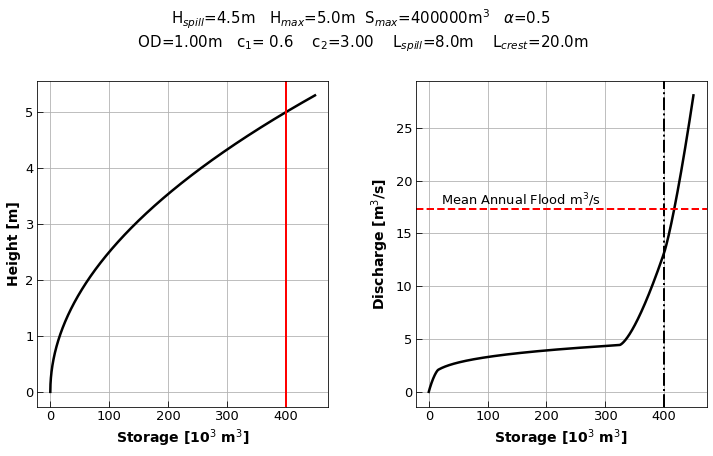

In [6]:
#This is for order 5
ax1, ax2 = plot_QSv(4.5, 5, 400000, 0.5, 1.0, 0.6, 3.0, 8, 20, state=1, area=20.25)

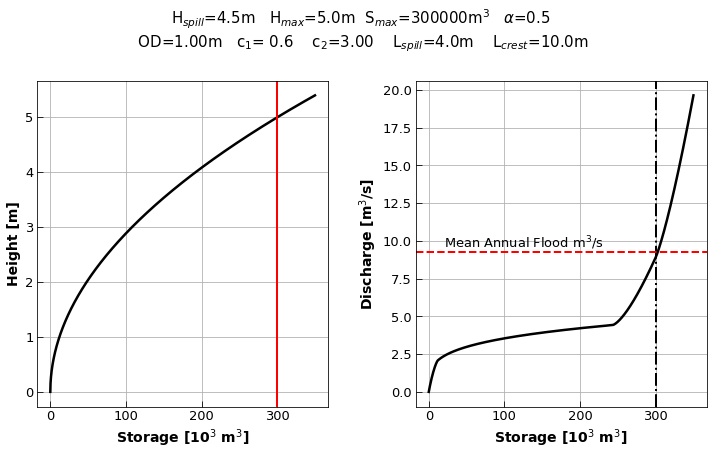

In [33]:
# USE this for order 4
ax1, ax2 = plot_QSv(4.5, 5, 300000, 0.5, 1.0, 0.6, 3.0, 4, 10, state=1, area=6.75)#,save=path+'Order_4'+s_name)   

In [34]:
storage = np.arange(0,  300000, 100)
height = [5.0 * pow(ss /  300000, 0.5) for ss in storage]
discharge = [dam_q_varParam_varState(hh, 0, 4.5, 5, 1.0, 0.6, 3.0, 4, 10,) for hh in height]
discharge2 = [dam_q_varParam_varState(hh, 0.25, 4.5, 5, 1.0, 0.6, 3.0, 4, 10,) for hh in height]
discharge3 = [dam_q_varParam_varState(hh, 0.50, 4.5, 5, 1.0, 0.6, 3.0, 4, 10,) for hh in height]
discharge4 = [dam_q_varParam_varState(hh, 0.75, 4.5, 5, 1.0, 0.6, 3.0, 4, 10,) for hh in height]
discharge5 = [dam_q_varParam_varState(hh, 1.0, 4.5, 5, 1.0, 0.6, 3.0, 4, 10,) for hh in height]


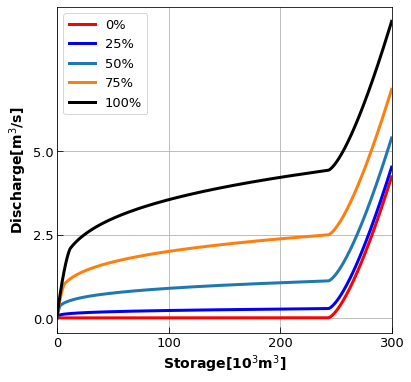

In [35]:
rcParams.update({'lines.linewidth':3})
fig, ax = plt.subplots(figsize=(6, 6))
# plt.subplots(figsize=(6, 6))
plt.plot(storage, discharge, c='r', label='0%')
plt.plot(storage, discharge2, c='b', label='25%')
plt.plot(storage, discharge3, label='50%')
plt.plot(storage, discharge4, label='75%')
plt.plot(storage, discharge5, c='k',label='100%')
plt.legend()
plt.xlim([0, 300000])
plt.xlabel('Storage[10$^3$m$^3$]')
plt.ylabel('Discharge[m$^3$/s]')
plt.grid()
plt.xticks(np.arange(0, 300000+50000, 100000), labels=np.arange(0, 350, 100))
plt.yticks(np.arange(0, 7.5, 2.5))
fig.savefig(path+'Order4_varQ_'+s_name + '.png', bbox_inches = 'tight', pad_inches = 0.5)

In [36]:
storage = np.arange(0,  200000, 100)
height = [5.0 * pow(ss /  200000, 0.5) for ss in storage]
discharge = [dam_q_varParam_varState(hh, 0, 4.5, 5, 1.0, 0.6, 3.0, 2, 5) for hh in height]
discharge2 = [dam_q_varParam_varState(hh, 0.25, 4.5, 5, 1.0, 0.6, 3.0, 2, 5) for hh in height]
discharge3 = [dam_q_varParam_varState(hh, 0.50, 4.5, 5, 1.0, 0.6, 3.0, 2, 5) for hh in height]
discharge4 = [dam_q_varParam_varState(hh, 0.75, 4.5, 5, 1.0, 0.6, 3.0, 2, 5) for hh in height]
discharge5 = [dam_q_varParam_varState(hh, 1.0, 4.5, 5, 1.0, 0.6, 3.0, 2, 5) for hh in height]

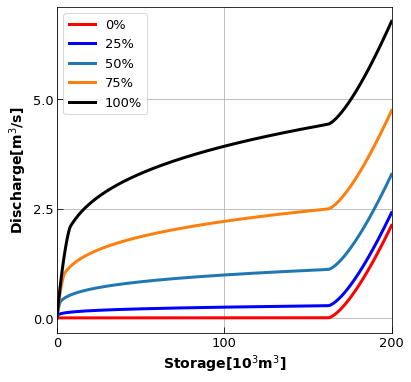

In [38]:
#Order 3 dam 
rcParams.update({'lines.linewidth':3})
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(storage, discharge, c='r', label='0%')
plt.plot(storage, discharge2, c='b', label='25%')
plt.plot(storage, discharge3, label='50%')
plt.plot(storage, discharge4, label='75%')
plt.plot(storage, discharge5, c='k',label='100%')
plt.legend()
plt.xlim([0, 200000])
plt.xlabel('Storage[10$^3$m$^3$]')
plt.ylabel('Discharge[m$^3$/s]')
plt.grid()
plt.xticks(np.arange(0, 200000+50000, 100000), labels=np.arange(0, 250, 100))
plt.yticks(np.arange(0, 7.5, 2.5))
fig.savefig(path+'Order3_varQ_'+s_name + '.png', bbox_inches = 'tight', pad_inches = 0.5)


In [3]:
def plot_QSv2(h_spill, h_max, s_max, alpha, diameter,c1, c2, L_spill, L_crest, state=1, area=None, axes=None, save=None):
    rcParams.update({'font.size': 13,'axes.labelweight':'bold','axes.labelsize':14,\
                                'ytick.major.size':6,'xtick.major.size':6,'xtick.direction':'in','ytick.direction':'in',\
                                'lines.linewidth':2.5})
    dam_params = ['pass',h_spill, h_max, s_max, alpha, diameter,c1, c2, L_spill, L_crest]
    storage = np.arange(0, s_max+5000, 100)
    height = [h_max * pow(ss / s_max, alpha) for ss in storage]
    discharge = [dam_q(hh, state, dam_params) for hh in height]
    
    ## Plot height-storage relationship
    if axes is not None:
        ax1 = axes[0]
        ax2 = axes[1]
    else:
        fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
        ax1 = ax[0]
        ax2 = ax[1]
    ax1.plot(storage, height, c ='k')
    ax1.axvline(x=s_max, c='r', linewidth=2)
    ax1.set(xlabel='Storage [10$^3$ m$^{3}$]',ylabel ='Height [m]',)
    ax1.grid()
    ax1.set_xticks(np.arange(0, s_max+5000+1, 10000))
    ax1.set_xticklabels(np.arange(0, (s_max+5000+1)/1000, 10).astype(int))
    ## Plot discharge-storage relationship
    ax2.plot(storage, discharge, c ='k')
    ax2.axvline(x=s_max, c='k', linewidth=2, linestyle='dashdot')
    if area is not None:
        ax2.axhline(y=3.12*(area**(0.57)), c='r', linewidth=2, linestyle='dashed')
        ax2.text(2000,3.12*(area**(0.57)) , 'Mean Annual Flood m$^3$/s', va='bottom', ha='left')
    ax2.set(xlabel='Storage [10$^3$ m$^3$]',ylabel ='Discharge [m$^3$/s]')
    ax2.grid()
    plt.subplots_adjust(wspace=0.3)
    plt.suptitle('H$_{spill}$=%.1fm   H$_{max}$=%.1fm  S$_{max}$=%dm$^3$'r'   $\alpha$=%.1f''\n'\
                    ' OD=%.2fm   c$_1$= %.1f    c$_2$=%.2f    L$_{spill}$=%.1fm    L$_{crest}$=%.1fm'\
                    %(h_spill, h_max, s_max, alpha,diameter,c1, c2, L_spill, L_crest ), size=15, y=1.05)
    if save is not None:
        fig.savefig(save + '.png', bbox_inches = 'tight', pad_inches = 0.5)
    return ax1, ax2

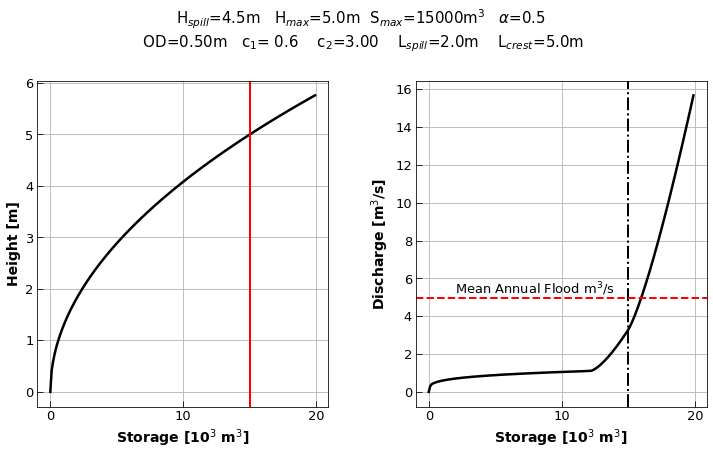

In [28]:
ax1, ax2 = plot_QSv2(4.5, 5, 15000, 0.5, 0.5, 0.6, 3.0, 2, 5, state=1, area=2.25)

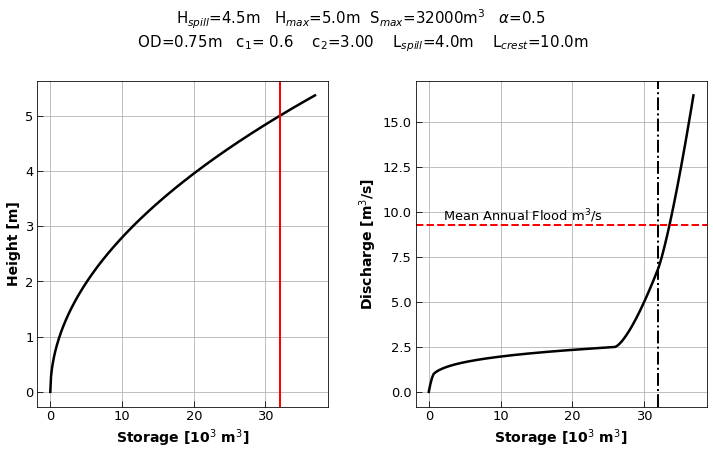

In [29]:
ax1, ax2 = plot_QSv2(4.5, 5, 32000, 0.5, 0.75, 0.6, 3.0, 4, 10, state=1, area=6.75)

## TIBEBU paper

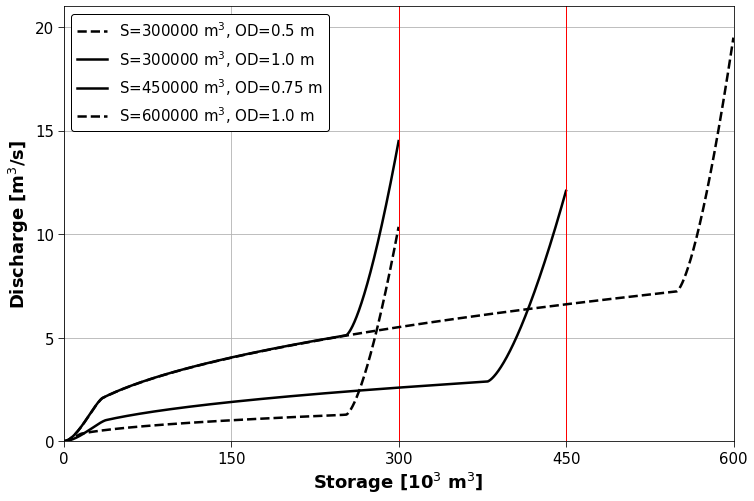

In [12]:
rcParams.update({'font.size': 15,'font.family':'sans-serif','axes.labelweight':'bold','axes.labelsize':18,\
                            'ytick.major.size':6,'xtick.major.size':6,'xtick.direction':'out','ytick.direction':'out',\
                            'lines.linewidth':2.5,"axes.titlepad":15, 'xtick.labelsize':15,'ytick.labelsize':15})

parameters = [['pass',6, 7, 300000, 0.9, 0.5, 0.6, 3.0, 3, 10],
              ['pass',6, 7, 300000, 0.9, 1.0, 0.6, 3.0, 3, 10],
              ['pass',6, 7, 450000, 0.9, 0.75, 0.6, 3.0, 3, 10],
              ['pass',12, 13, 600000, 0.9, 1.0, 0.6, 3.0, 4, 10]]
styles = ['dashed','solid', 'solid', 'dashed']
fig, ax = plt.subplots(figsize=(12, 8))
for i, params in enumerate(parameters):
    dam_params = params.copy()
    storage = np.arange(0, params[3], 100)
    height = [params[2] * pow(ss / params[3], params[4]) for ss in storage]
    discharge = [dam_q(hh, 1, dam_params) for hh in height]

    ax.plot(storage, discharge, c ='k', label=f'S={params[3]} m$^3$, OD={params[5]} m', linestyle=styles[i])
    ax.axvline(x=params[3], c='r', linewidth=1, linestyle='solid')
ax.set(xlabel='Storage [10$^3$ m$^3$]',ylabel ='Discharge [m$^3$/s]')
ax.set_xticks(np.arange(0, 600001, 150000))
ax.set_xticklabels(np.arange(0, 601, 150))
ax.set_yticks(np.arange(0,21,5))
ax.set_xlim([0, 600001])
ax.set_ylim([0, 21])
ax.grid()
ax.legend(facecolor='white', edgecolor='k', framealpha=1)


# New setup

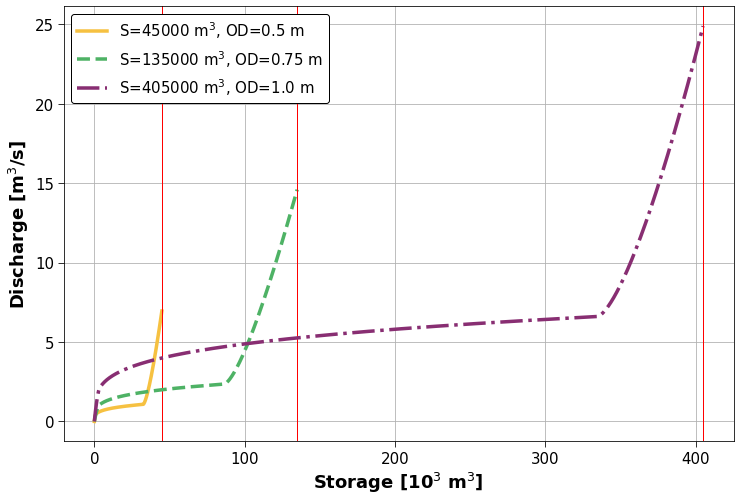

In [4]:
rcParams.update({'font.size': 15,'font.family':'sans-serif','font.sans-serif':'Arial','axes.labelweight':'bold','axes.labelsize':18,\
                            'ytick.major.size':6,'xtick.major.size':6,'xtick.direction':'out','ytick.direction':'out',\
                            'lines.linewidth':2.5,"axes.titlepad":15, 'xtick.labelsize':15,'ytick.labelsize':15})

parameters = [['pass',4.25, 5, 45000, 0.5, 0.50, 0.6, 3, 3, 8],
              ['pass',4., 5, 135000, 0.5, 0.75, 0.6, 3, 4, 10],
              ['pass',10, 11, 405000, 0.5, 1.0, 0.6, 3.0, 6, 15,],
               ]
              
styles = ['solid','dashed', 'dashdot', 'dashed']
colors = ['#f6c141', '#4eb265', '#882e72', 'k', 'cyan']
areas = [2.25, 6.75,20.25]
fig, ax = plt.subplots(figsize=(12, 8))
for i, params in enumerate(parameters):
    dam_params = params.copy()
    storage = np.arange(0, params[3], 100)
    height = [params[2] * pow(ss / params[3], params[4]) for ss in storage]
    discharge = [dam_q(hh, 1, dam_params) for hh in height]

    ax.plot(storage, discharge,  label=f'S={params[3]} m$^3$, OD={params[5]} m', linestyle=styles[i], c=colors[i], linewidth=3.5)
    # ax.axhline(y=3.12*areas[i]**0.57, c=colors[i], linewidth=1.5, linestyle='solid')
    ax.axvline(x=params[3], c='r', linewidth=1, linestyle='solid')
ax.set(xlabel='Storage [10$^3$ m$^3$]',ylabel ='Discharge [m$^3$/s]')
ax.set_xticks(np.arange(0, 420000, 100000))
ax.set_xticklabels(np.arange(0, 420, 100))
# ax.set_yticks(np.arange(0,21,5))
# ax.set_xlim([0, 150001])
# ax.set_ylim([0, 21])
ax.grid()
ax.legend(facecolor='white', edgecolor='k', framealpha=1, loc='upper left')
fig.savefig('../data/figures/QvS_newsetup.png', bbox_inches = 'tight', pad_inches = 0.5)

In [28]:
rcParams.update({'font.size': 15,'font.family':'sans-serif','font.sans-serif':'Arial','axes.labelweight':'bold','axes.labelsize':18,\
                            'ytick.major.size':6,'xtick.major.size':6,'xtick.direction':'out','ytick.direction':'out',\
                            'lines.linewidth':2.5,"axes.titlepad":15, 'xtick.labelsize':15,'ytick.labelsize':15})

parameters = [['pass',4.25, 5, 45000, 0.5, 0.50, 0.6, 3, 3, 8],
              ['pass',4., 5, 135000, 0.5, 0.75, 0.6, 3, 4, 10],
              ['pass',10, 11, 405000, 0.5, 1.0, 0.6, 3.0, 6, 15,],
               ]
              
styles = ['solid','dashed', 'dashdot', 'dashed']
colors = ['#f6c141', '#4eb265', '#882e72', 'k', 'cyan']
areas = [2.25, 6.75,20.25]
# fig, ax = plt.subplots(figsize=(12, 8))
for params in parameters:
    dam_params = params.copy()
    storage = np.arange(0, params[3], 100)
    height = [params[2] * pow(ss / params[3], params[4]) for ss in storage]
    height = np.array(height)
    idx = np.where(height>=params[1]-0.01)[0]
    print(f's:{storage[idx[0]]}  h:{height[idx[0]]} max = {params[3]}')


s:32400  h:4.242640687119285 max = 45000
s:86000  h:3.9907299991262155 max = 135000
s:334100  h:9.990872377535283 max = 405000


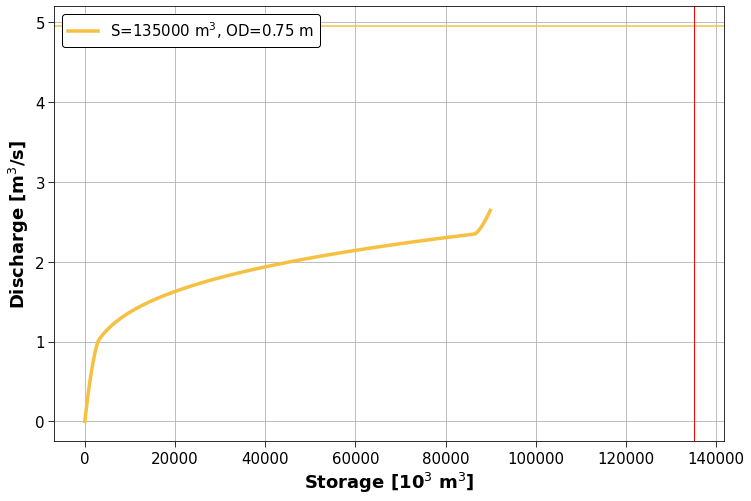

In [10]:
rcParams.update({'font.size': 15,'font.family':'sans-serif','font.sans-serif':'Arial','axes.labelweight':'bold','axes.labelsize':18,\
                            'ytick.major.size':6,'xtick.major.size':6,'xtick.direction':'out','ytick.direction':'out',\
                            'lines.linewidth':2.5,"axes.titlepad":15, 'xtick.labelsize':15,'ytick.labelsize':15})

parameters = [
            # ['pass',4.25, 5, 45000, 0.5, 1.0, 0.6, 3, 3, 8],
              ['pass',4., 5, 135000, 0.5, 0.75, 0.6, 3, 4, 10],
            #   ['pass',4., 5, 135000, 0.5, 1.25, 0.6, 3, 4, 10],
              # ['pass',10, 11, 405000, 0.5, 1.0, 0.6, 3.0, 6, 15,],
               ]
              
styles = ['solid','dashed', 'dashdot', 'dashed', 'dashed']
colors = ['#f6c141', '#4eb265', '#882e72', 'k', 'cyan']
areas = [2.25,2.25, 6.75,6.75,20.25]
fig, ax = plt.subplots(figsize=(12, 8))
for i, params in enumerate(parameters):
    dam_params = params.copy()
    storage = np.arange(0, 90000, 100)
    height = [params[2] * pow(ss / params[3], params[4]) for ss in storage]
    discharge = [dam_q(hh, 1, dam_params) for hh in height]

    ax.plot(storage, discharge,  label=f'S={params[3]} m$^3$, OD={params[5]} m', linestyle=styles[i], c=colors[i], linewidth=3.5)
    ax.axhline(y=3.12*areas[i]**0.57, c=colors[i], linewidth=1.5, linestyle='solid')
    ax.axvline(x=params[3], c='r', linewidth=1, linestyle='solid')
ax.set(xlabel='Storage [10$^3$ m$^3$]',ylabel ='Discharge [m$^3$/s]')
# ax.set_xticks(np.arange(0, 420000, 100000))
# ax.set_xticklabels(np.arange(0, 420, 100))
# ax.set_yticks(np.arange(0,21,5))
# ax.set_xlim([0, 150001])
# ax.set_ylim([0, 21])
ax.grid()
ax.legend(facecolor='white', edgecolor='k', framealpha=1, loc='upper left')
